In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings

In [3]:
np.random.seed(42)

normal_data  = np.random.randn(1000)
anamolis_data = np.random.randn(20) * 4 + 10


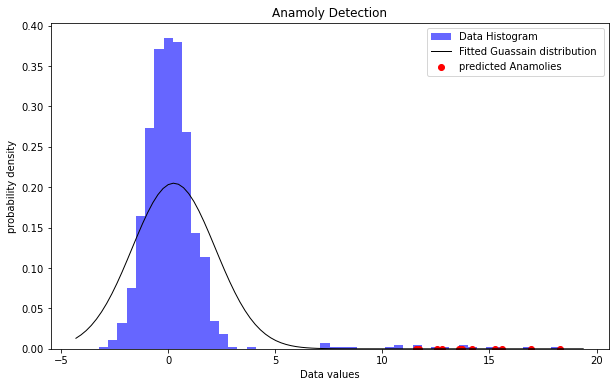

In [12]:
data = np.concatenate((normal_data, anamolis_data))

mu, sigma = norm.fit(data)

pdf_values = norm.pdf(data, mu, sigma)

threshold_percentile = 1
threshold = np.percentile(pdf_values, threshold_percentile)

anamoly_indices  = np.where(pdf_values < threshold)[0]

plt.figure(figsize = (10,6))

plt.hist(data, bins = 50, density = True, alpha = 0.6, color = 'blue', label = 'Data Histogram')

xmin, xmax  = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k', linewidth = 1, label = 'Fitted Guassain distribution ')

plt.scatter(data[anamoly_indices], np.zeros_like(anamoly_indices), color= 'red', label = 'predicted Anamolies')

plt.title("Anamoly Detection")  #using gussaian method
plt.xlabel("Data values")
plt.ylabel("probability density")

plt.legend()
plt.show()

In [16]:
from sklearn.ensemble import IsolationForest

np.random.seed(42)
normal_data = np.random.randn(100, 100)
anomalous_data = np.random.randn(10, 2) + np.array([8, 8])

data = np.vstack((normal_data, anomalous_data))

isolation_forest = IsolationForest(contamination = 0.05)

isolation_forest.fit(data)

predictions = isolation_forest.predict(data)

anamoly_scores = isolation_forest.decision_function(data)

plt.figure(figsize=(10, 6))

plt.scatter(normal_data[:, 0], normal_data[:, 1], color = 'blue', label = 'Normal Data')

plt.scatter(anomalous_data[:, 0], anomalous_data[:, 1], color = 'red', label = 'Anamolous Data')

plt.scatter(data[predictions == -1] [:, 0 ], data[predictions == -1] [:, 1], color = 'yellow', label = 'Predicted Anamolies')

plt.title("Anamoly Detection Using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 100 and the array at index 1 has size 2